# ESGI 2025 AALBORG

##

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mm = 0.29
pp = 0.3
raio = 0.1

In [ ]:
def yycc(x,m,p):

    out = m *(2*p*x -x**2)/p**2
    if (x > p):
        out = m*(1 -2*p +2*p*x-x**2)/(1-p)**2
    return out

In [ ]:
def dyycc(x,m,p):

    out = m *(2*p -2*x)/p**2
    if (x > p):
        out = m*(2*p-2*x)/(1-p)**2
    return out

In [ ]:
npts = 100
xx = np.linspace(0,1,npts)
yy = np.array([yycc(u,mm,pp) for u in xx])

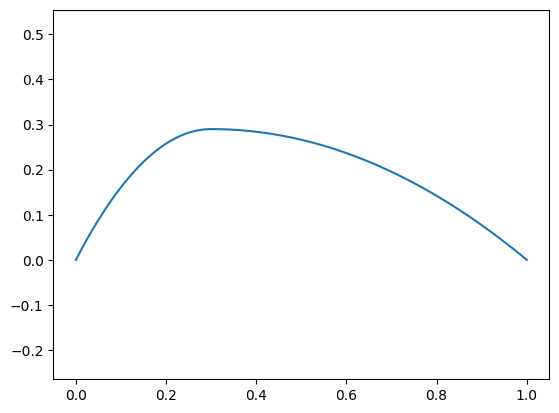

In [ ]:
plt.axis('equal')
plt.plot(xx,yy)

In [ ]:
tt = np.sqrt(raio)/1.1

In [ ]:
def width(x,t):
  out = t *(0.2969*np.sqrt(x)-0.1260 *x -0.3516 * x**2 + 0.2843 * x**3 -0.10150 * x**4)/0.20
  return out

In [ ]:
largura = np.array([width(u,tt) for u in xx])

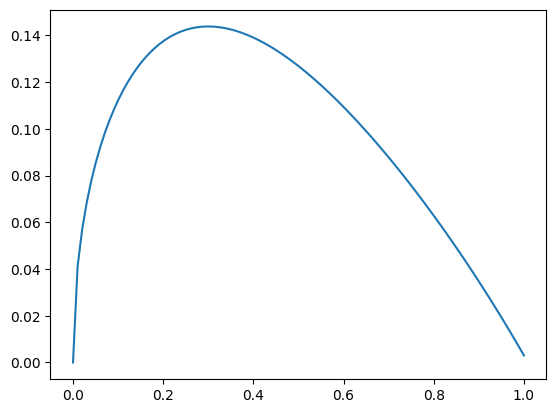

In [ ]:
plt.plot(xx,largura)

In [ ]:
def varphi(x,m,p):
  out = np.arctan2(dyycc(x,m,p),1)
  return out

In [ ]:
angulos = np.array([varphi(u,mm,pp) for u in xx])

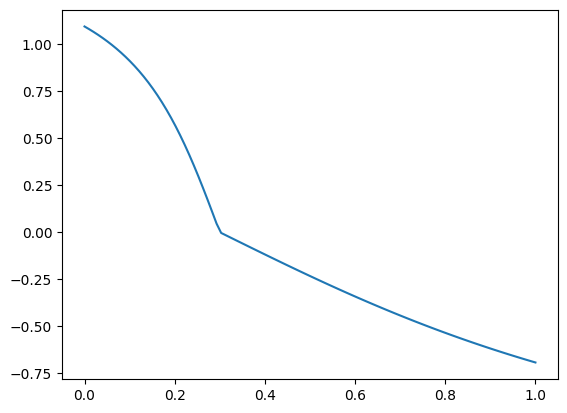

In [ ]:
plt.plot(xx,angulos)

In [ ]:
def xxuu(x,m,p,t):
  out = x - width(x,t) * np.sin(varphi(x,m,p))
  return out

def yyuu(x,m,p,t):
  out = yycc(x,m,p) + width(x,t) * np.cos(varphi(x,m,p))
  return out

def xxll(x,m,p,t):
  out = x + width(x,t) * np.sin(varphi(x,m,p))
  return out

def yyll(x,m,p,t):
  out = yycc(x,m,p) - width(x,t) * np.cos(varphi(x,m,p))
  return out


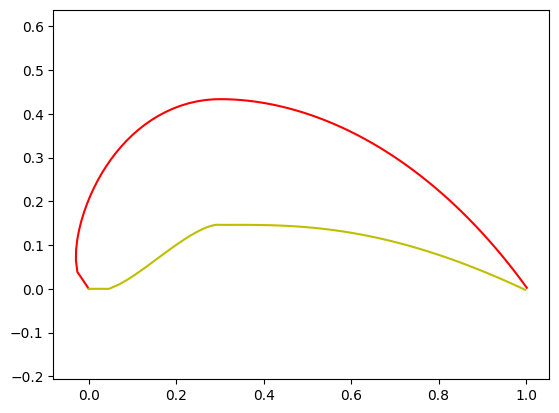

In [ ]:
XU = np.array([xxuu(u,mm,pp,tt) for u in xx])
YU = np.array([yyuu(u,mm,pp,tt) for u in xx])
XL = np.array([xxll(u,mm,pp,tt) for u in xx])
YL = np.array([yyll(u,mm,pp,tt) for u in xx])

plt.axis('equal')
plt.plot(XU,YU,'r')
plt.plot(XL,YL,'y')

In [ ]:
import tensorflow as tf
import pandas as pd
number_of_inputs=9
input_size=(4, number_of_inputs)
inp_layer=tf.keras.Input(shape=(input_size))
flat_layer=tf.keras.layers.Flatten()(inp_layer)
layer_1=tf.keras.layers.Dense(20, activation='relu')(flat_layer)
layer_2=tf.keras.layers.Dense(10, activation='relu')(layer_1)
layer_3=tf.keras.layers.Dense(5, activation='relu')(layer_2)
output_layer=tf.keras.layers.Dense(3)(layer_3)
NN_model=tf.keras.models.Model(inputs=[inp_layer], outputs=output_layer)

Last m= 0.2833333333333333 last p= 0.4666666666666667 last r= 0.27591666666666664 

Shape of input dataset= (1728, 4, 9) , shape of output dataset= (1728, 3) 

Shape of input train dataset (1555, 4, 9) Shape of output train dataset (1555, 3)


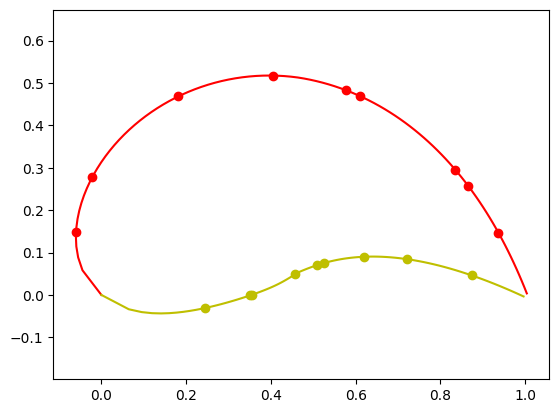

In [ ]:
#assuming that the sampled points are given as two tuples of 9 points of (xxuu, yyuu) along with 9 points (xxll, yyll), for a total of 36 values

number_of_generated_sets=12

m_start=0.1
m_end=0.3
p_start=0.1
p_end=0.5
r_start=np.square(m_start)*1.1
r_end=0.3

for k in range(0, number_of_generated_sets):
  for j in range(0, number_of_generated_sets):
    for i in range(0, number_of_generated_sets):
      m=m_start+(m_end-m_start)*i/number_of_generated_sets
      p=p_start+(p_end-p_start)*j/number_of_generated_sets
      r=r_start+(r_end-r_start)*k/number_of_generated_sets
      t=np.sqrt(r/1.1)

      x=np.linspace(0, 1-1/number_of_inputs, number_of_inputs)
      shape_x=np.shape(x)
      xu=x+np.random.rand(shape_x[0])/number_of_inputs
      xl=x+np.random.rand(shape_x[0])/number_of_inputs
      XU_i = np.array([xxuu(u,m,p,t) for u in xu])
      YU_i = np.array([yyuu(u,m,p,t) for u in xu])
      XL_i = np.array([xxll(u,m,p,t) for u in xl])
      YL_i = np.array([yyll(u,m,p,t) for u in xl])

      input_data_i=tf.constant([[XU_i, YU_i, XL_i, YL_i]])
      output_data_i=tf.constant([[m, p, r]])

      if i==0 and j==0 and k==0:
        input_dataset=input_data_i
        output_dataset=output_data_i
      else:
        input_dataset=tf.concat([input_dataset, input_data_i], 0)
        output_dataset=tf.concat([output_dataset, output_data_i], 0)

plt.axis('equal')
plt.plot(XU_i,YU_i,'ro')
plt.plot(XL_i,YL_i,'yo')

XU = np.array([xxuu(u,m,p,t) for u in xx])
YU = np.array([yyuu(u,m,p,t) for u in xx])
XL = np.array([xxll(u,m,p,t) for u in xx])
YL = np.array([yyll(u,m,p,t) for u in xx])

plt.axis('equal')
plt.plot(XU,YU,'r')
plt.plot(XL,YL,'y')

print("Last m=", m, "last p=", p, "last r=", r, "\n")
#list(input_dataset.as_numpy_iterator())
print("Shape of input dataset=", np.shape(input_dataset), ", shape of output dataset=", np.shape(output_dataset), "\n")

#input_dataset=tf.data.Dataset.from_tensor_slices(input_dataset)
#output_dataset=tf.data.Dataset.from_tensor_slices(output_dataset)

input_train_dataset, input_test_dataset=tf.split(input_dataset, [int(np.round(0.9*np.pow(number_of_generated_sets, 3))), int(np.round(0.1*np.pow(number_of_generated_sets, 3)))])
output_train_dataset, output_test_dataset=tf.split(output_dataset, [int(np.round(0.9*np.pow(number_of_generated_sets, 3))), int(np.round(0.1*np.pow(number_of_generated_sets, 3)))])

print("Shape of input train dataset", np.shape(input_train_dataset), "Shape of output train dataset", np.shape(output_train_dataset))

In [ ]:
NN_model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07))
NN_model.fit(x=input_train_dataset, y=output_train_dataset, epochs=100, verbose=1, batch_size=12)

Epoch 1/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0376
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0062
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4340e-04
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2111e-04
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3792e-04
Epoch 9/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8515e-04
Epoch 10/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5753e-04
Epoch 11/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7495e-04
Epoch 12/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4341e-04
Epoch 13/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6173e-04
Epoch 14/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9226e-04
Epoch 1

In [ ]:
NN_model.evaluate(input_test_dataset, output_test_dataset)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6023e-04  


0.0005080237751826644

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Forecast= [[0.23925012 0.4319638  0.15667884]]


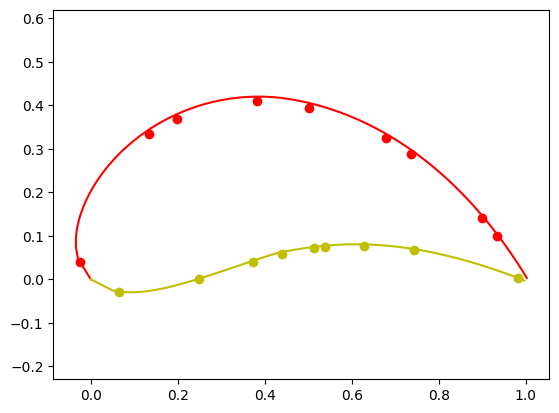

In [ ]:
x_test=np.linspace(0, 1-1/number_of_inputs, number_of_inputs)
shape_x_test=np.shape(x_test)
xu=x+np.random.rand(shape_x_test[0])/number_of_inputs
xl=x+np.random.rand(shape_x_test[0])/number_of_inputs


m=0.2321 #max in training was 0.3
p=0.4323423 #max in training was 0.5
r=0.15 #max in training is 0.3
t=np.sqrt(r/1.1)

XU_test = np.array([xxuu(u,m,p,t) for u in xu])
YU_test = np.array([yyuu(u,m,p,t) for u in xu])
XL_test = np.array([xxll(u,m,p,t) for u in xl])
YL_test = np.array([yyll(u,m,p,t) for u in xl])

plt.axis('equal')
plt.plot(XU_test,YU_test,'ro')
plt.plot(XL_test,YL_test,'yo')

input_data_test=tf.constant([[XU_test, YU_test, XL_test, YL_test]])

forecast = NN_model.predict(input_data_test)
print("Forecast=", forecast)

XU = np.array([xxuu(u,forecast[0, 0],forecast[0, 1], np.sqrt(forecast[0, 2]/1.1)) for u in xx])
YU = np.array([yyuu(u,forecast[0, 0],forecast[0, 1], np.sqrt(forecast[0, 2]/1.1)) for u in xx])
XL = np.array([xxll(u,forecast[0, 0],forecast[0, 1], np.sqrt(forecast[0, 2]/1.1)) for u in xx])
YL = np.array([yyll(u,forecast[0, 0],forecast[0, 1], np.sqrt(forecast[0, 2]/1.1)) for u in xx])

plt.axis('equal')
plt.plot(XU,YU,'r')
plt.plot(XL,YL,'y')

